In [1]:
import sys
sys.path.append("./grainsize")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from grainsize import GrainSize
from grainsize import XRF

Import SR21 grain size data

In [3]:
sr21_top_path = r"C:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\SR21P7_GS_2023_11_08.xlsx"
sr21_bottom_path = r"C:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\SR21P7_GS_2023_11_22.xlsx"

sr21_top = GrainSize(fname=sr21_top_path)
sr21_bottom = GrainSize(fname=sr21_bottom_path)

Clean the data

In [4]:
sr21_top.clean_data()
sr21_bottom.clean_data()

c:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\pythonProject1\grainsize\core.py:152: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataframe.fillna(0, inplace=True)
c:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\pythonProject1\grainsize\core.py:152: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataframe.fillna(0, inplace=True)


grain_size,0.010000,0.011362,0.012909,0.014666,0.016663,0.018932,0.021510,0.024439,0.027767,0.031548,...,665.792960,756.449394,859.449888,976.475250,1109.435147,1260.499277,1432.132766,1627.136404,1848.692342,2100.416023
depth,,,,,,,,,,,,,,,,,,,,,
114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.848195,2.074911,1.279844,0.707133,0.348425,0.126179,0.000601,0.000000,0.0,0.0
118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056505,0.001119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500667,0.200027,0.062963,0.001279,0.000000,0.000000,0.000000,0.000000,0.0,0.0
130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.536477,0.047622,0.000829,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.511299,0.120767,0.000670,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.118784,0.050686,0.001070,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.267932,0.053834,0.000964,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.144807,0.011745,0.000105,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


concatenate both together to create one df for sr21

In [5]:
sr21 = GrainSize(dataframe=pd.concat([sr21_top, sr21_bottom]))

Create a normalized data frame

In [6]:
sr21_norm = sr21.normalize_gs()

From the normalized data, create:

- GS categories (clay, silt, sand, gravel)
- statistics (mean, mode, median, etc)

In [7]:
sr21_cats = sr21_norm.create_categories()
sr21_stats = sr21_norm.create_stats_df()

In [8]:
sr21_stats.dataframe["std"].mean()

1.455236684517051

Extract fine fraction and concatenate with sr21 statistics df as preparation for plotting

In [9]:
sr21_fines = sr21_norm.fine_fraction()["total"]
sr21_stats_fines = GrainSize(dataframe=pd.concat([sr21_stats, sr21_fines], axis=1))

In [10]:
sr21_stats_fines

,median,mode,mean,std,skewness,kurtosis,total
1.0,4.583030,3.124860,31.100178,1.318611,-0.151147,-1.304937,97.845711
2.0,8.676730,27.372987,1.650544,1.201439,-0.288399,-1.355227,94.757126
3.0,4.583030,3.550351,1.278633,1.326960,-0.051187,-1.221095,97.503348
4.0,5.207069,2.750363,40.146180,1.257699,0.309996,-1.588517,93.019943
5.0,4.583030,3.124860,45.612608,1.350208,0.421891,-1.287866,95.658275
6.0,5.916080,4.583030,40.146180,1.175834,-0.149886,-1.668603,93.852873
7.0,5.916080,5.916080,35.334874,1.265351,0.050257,-1.658991,94.467380
8.0,5.207069,3.124860,35.334874,1.271246,0.045955,-1.632607,95.126923
9.0,5.916080,3.124860,51.823363,1.256397,-0.085669,-1.541756,95.558812
10.0,5.207069,3.124860,40.146180,1.289120,0.007099,-1.550647,96.007972


(<Figure size 800x600 with 7 Axes>,
 array([<Axes: title={'center': 'Median'}, xlabel='Grain size (µm)', ylabel='Depth (cm)'>,
        <Axes: title={'center': 'Mode'}, xlabel='Grain size (µm)'>,
        <Axes: title={'center': 'Mean'}, xlabel='Grain size (µm)'>,
        <Axes: title={'center': 'Std'}, xlabel='Grain size (µm)'>,
        <Axes: title={'center': 'Skewness'}>,
        <Axes: title={'center': 'Kurtosis'}>,
        <Axes: title={'center': '< 63 µm'}, xlabel='Percentage (%)'>],
       dtype=object))

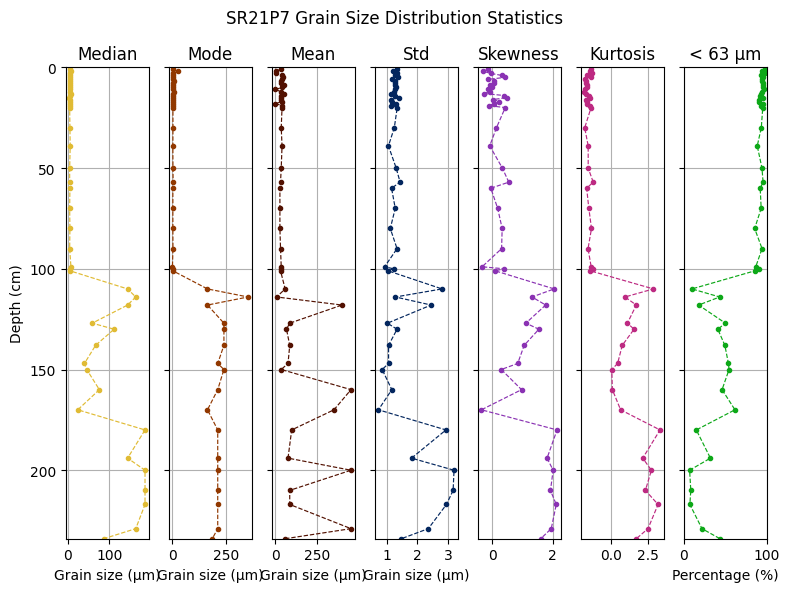

In [11]:
sr21_stats_fines.plot_stats_fines(figsize=(8, 6), marker=".", core_name="SR21P7")

Now export the data into a csv file

In [12]:
# sr21_stats_fines.dataframe.to_csv("sr21-stats-fines-corrected.csv")

### Now for SR19 data, first we have to concatenate the different csv and excel files that hold the data.

In [13]:
# # already have normalized data for part of sr19
# path = r"C:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\clean_gs_files\sr19_clean\SR19_norm_2024-03-11.csv"
# sr19_norm_partial = GrainSize(dataframe=pd.read_csv(path, index_col="depth"))


In [14]:
# sr19_additional_path = r"C:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\SRP19_timor.xlsx"
# sr19_additional = GrainSize(fname=sr19_additional_path, skiprows=0, sheet_name="P4_data")
# sr19_additional.clean_data()
# sr19_additional = sr19_additional.normalize_gs()

In [15]:
# sr19_norm = GrainSize(dataframe=pd.concat([sr19_norm_partial, sr19_additional], axis=0).fillna(0))

Sort the unified sr19 df, `sr19_norm`, by its index, `depth`

In [16]:
# sr19_norm = sr19_norm.sort_index(axis=0)

In [17]:
# sr19_raw = pd.read_excel(io="../sr19_merged_raw.xlsx", header=0, index_col="depth")

In [18]:
# sr19_full = GrainSize(dataframe=pd.concat([sr19_raw, sr19_additional], axis=1).fillna(0))

In [19]:
# # sort by depth, then by columns
# sr19_full = sr19_raw.sort_index(axis=0)
# sr19_full = sr19_raw.sort_index(axis=1)

#### There are 3 files containing grain size data of SR19P4. We'll import the three of them separately, create as GrainSize object of each, clean, then concatenate and normalize.

In [20]:
mgm = GrainSize(fname="./sr19-gs-raw/sr19-mgm.xlsx")
iolr = GrainSize(fname="./sr19-gs-raw/sr19-iolr.xlsx", sheet_name="P4", skiprows=0)
marsed = GrainSize(dataframe=pd.read_csv("./sr19-gs-raw/sr19-marsed.csv", index_col="mean_depth_cm"))

In [21]:
iolr.head()

,Unnamed: 0,[142] Average of 'P4 080-081'-12/26/2019 2:05:50 PM,[102] Average of 'P4 050-051'-12/26/2019 12:37:10 PM,[86] Average of 'P4 205-206'-12/26/2019 12:12:57 PM,[90] Average of 'P4 026-027'-12/26/2019 12:18:45 PM,Unnamed: 1,[170] Average of 'P4 000-002'-12/26/2019 2:48:06 PM,[162] Average of 'P4 105-106'-12/26/2019 2:35:57 PM,[166] Average of 'P4 130-131'-12/26/2019 2:42:16 PM,[150] Average of 'P4 155-156'-12/26/2019 2:17:27 PM,[78] Average of 'P4 180-181'-12/26/2019 12:01:09 PM,[174] Average of 'P4 019-020'-12/26/2019 2:54:00 PM,[146] Average of 'P4 230-231'-12/26/2019 2:11:36 PM,[82] Average of 'P4 260-261'-12/26/2019 12:06:52 PM,[154] Average of 'P4 285-286'-12/26/2019 2:23:49 PM,[138] Average of 'P4 310-312'-12/26/2019 1:57:26 PM,[66] Average of 'P4 360-361'-12/26/2019 11:42:32 AM,[74] Average of 'P4 400-401'-12/26/2019 11:53:56 AM,[70] Average of 'P4 420-421'-12/26/2019 11:48:13 AM
0,Size Classes (μm),Volume (%),Volume (%),Volume (%),Volume (%),NaN,Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%),Volume (%)
1,0.01,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.011362,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.012909,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.014666,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Clean the data for `mgm` and `iolr` data frames

In [22]:
mgm.clean_data()

c:\Users\jvaal\OneDrive\Documents\Academics\msc_thesis\sedimentary-records\msc_github_code\pythonProject1\grainsize\core.py:152: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.dataframe.fillna(0, inplace=True)


grain_size,0.010000,0.011362,0.012909,0.014666,0.016663,0.018932,0.021510,0.024439,0.027767,0.031548,...,1109.435147,1260.499277,1432.132766,1627.136404,1848.692342,2100.416023,2386.415181,2711.356871,3080.543628,3500.000000
depth,,,,,,,,,,,,,,,,,,,,,
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.204220,0.134659,0.080463,0.043482,0.020273,0.000345,0.000000,0.000000,0.000000,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.882118,0.832649,0.767398,0.687856,0.595259,0.491031,0.377028,0.254772,0.129412,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.252522,0.196565,0.166807,0.139889,0.114648,0.090485,0.066938,0.044038,0.021976,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296397,0.188320,0.134004,0.093538,0.061951,0.022519,0.000453,0.000000,0.000010,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.193474,0.183324,0.169452,0.152293,0.132072,0.109050,0.083792,0.056723,0.028858,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067756,0.039010,0.020088,0.000360,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.257630,0.197651,0.149207,0.111339,0.069444,0.055175,0.041403,0.026945,0.000677,0.0
11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087697,0.071814,0.058793,0.048078,0.038679,0.029925,0.021225,0.000366,0.000097,0.0


In [23]:
iolr.clean_data()

grain_size,0.010000,0.011362,0.012909,0.014666,0.016663,0.018932,0.021510,0.024439,0.027767,0.031548,...,1109.435147,1260.499277,1432.132766,1627.136404,1848.692342,2100.416023,2386.415181,2711.356871,3080.543628,3500.000000
depth,,,,,,,,,,,,,,,,,,,,,
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.655320,1.560013,1.421074,1.300364,1.177552,1.002107,0.785154,0.538649,2.758373e-01,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.152709,0.101643,0.081443,0.064588,0.049951,0.037390,0.025929,0.000443,1.171305e-04,0.0
27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048876,0.034915,0.024003,0.000500,0.000000,0.000000,0.000000,0.000000,5.564667e-07,0.0
51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.492050,0.454581,0.411542,0.363195,0.309598,0.237970,0.181847,0.122131,4.730753e-02,0.0
81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.543808,0.512244,0.471097,0.421251,0.363659,0.299349,0.229587,0.154551,6.307467e-02,0.0
106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794264,0.766550,0.718180,0.651505,0.568774,0.472318,0.364585,0.247702,1.260730e-01,0.0
131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.704256,1.647037,1.544878,1.403589,1.226133,1.003264,0.774905,0.527097,2.683834e-01,0.0
156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.348493e-09,0.0
181.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147761,0.088741,0.059160,0.037969,0.022717,0.000451,0.000000,0.000000,6.913896e-06,0.0


In [24]:
marsed.rename_axis("depth", axis=0, inplace=True)

Now we can concatenate the three dataframes, then sort by index (depth) and then by columns, before normalizing.

In [25]:
sr19 = GrainSize(dataframe=pd.concat([mgm, iolr, marsed]))

In [26]:
sr19.head()

,0.01,0.011362,0.012909,0.014666,0.016663,0.018932,0.02151,0.024439,0.027767,0.031548,...,863.883,948.338,1041.05,1142.83,1254.55,1377.2,1511.84,1659.64,1821.89,2000
depth,,,,,,,,,,,,,,,,,,,,,
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# ensure that all of the columns are of numeric type
sr19.columns = sr19.columns.astype(float)

In [28]:
# convert NaN values to zero
sr19.fillna(0, inplace=True)

In [29]:
sr19.columns = pd.to_numeric(sr19.columns, errors="coerce")
print(sr19.columns)

Index([              0.01, 0.0113616310045195, 0.0129086659082859,
       0.0146663498810565, 0.0166633655531742, 0.0189323010708587,
       0.0215101818833566, 0.0244390749398798, 0.0277667751558714,
        0.031547585350647,
       ...
                  863.883,            948.338,            1041.05,
                  1142.83,            1254.55,             1377.2,
                  1511.84,            1659.64,            1821.89,
                   2000.0],
      dtype='float64', length=218)


Now we can sort `sr19` df by rows (depth) and columns (grain size classes)

In [31]:
# for some reason, this one raises an error. different approach below
# sr19.sort_index(axis=1, inplace=True, ascending=True)

In [32]:
# Get sorted column positions
sorted_cols = sorted(sr19.columns)
# Reindex the dataframe with sorted columns
sr19_sorted = sr19.reindex(columns=sorted_cols)

`sr19_sorted` will hold the data for sr19 from now on.